In [1]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Load data
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

if len(training_images) == 0 or len(test_images) == 0:
    print("Downloading CIFAR-10 dataset...")
    (training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

train_shape = training_images.shape # Mendapatkan bentuk data latih
test_shape = test_images.shape      # Mendapatkan bentuk data uji
print(f'Terdapat {train_shape[0]} contoh dengan bentuk ({train_shape[1]}, {train_shape[2]}) dan dengan {train_shape[3]} warna')
print(f'Terdapat {test_shape[0]} contoh dengan bentuk ({test_shape[1]}, {test_shape[2]}) dan dengan {test_shape[3]} warna')


Terdapat 50000 contoh dengan bentuk (32, 32) dan dengan 3 warna
Terdapat 10000 contoh dengan bentuk (32, 32) dan dengan 3 warna


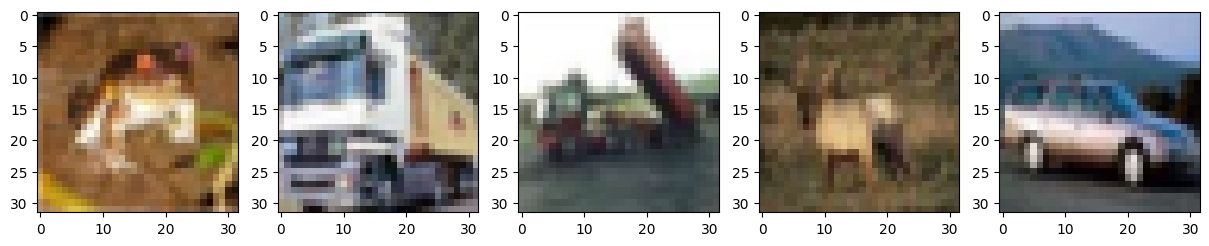

In [14]:
# Visualisasi beberapa contoh gambar sebelum augmentasi
fig, axs = plt.subplots(1, 5, figsize=(15, 3))    # Membuat subplot dengan 1 baris dan 5 kolom
for i in range(5):
    axs[i].imshow(training_images[i])             # Menampilkan gambar ke-i
    axs[i].axis('on')                             # Menampilkan sumbu gambar
plt.show()                                        # Menampilkan gambar-gambar tersebut


In [15]:
# Data Processing with Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

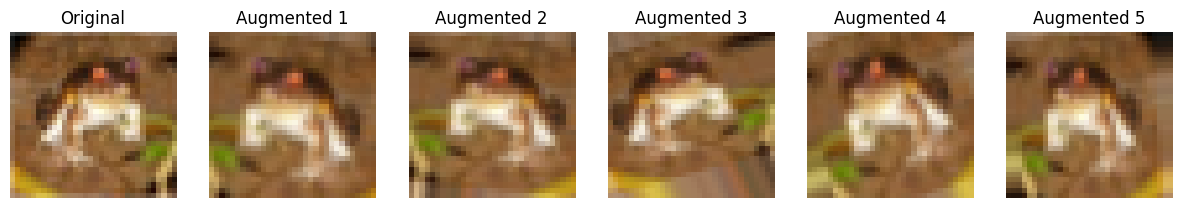

In [12]:
# Contoh visualisasi augmentasi pada satu gambar

img = training_images[0]  # Mengambil satu gambar
img = img.reshape((1,) + img.shape)  # Menyesuaikan bentuk gambar untuk augmentasi
augmented_img = [datagen.flow(img).next().squeeze() for _ in range(5)]  # Melakukan augmentasi pada gambar

fig, axs = plt.subplots(1, 6, figsize=(15, 3))  # Membuat subplot dengan 1 baris dan 6 kolom
axs[0].imshow(training_images[0])  # Menampilkan gambar asli
axs[0].set_title('Original')  # Menampilkan judul gambar asli
axs[0].axis('off')  # Menyembunyikan sumbu gambar

for i, aug_img in enumerate(augmented_img):
    axs[i+1].imshow(aug_img)  # Menampilkan gambar yang telah di-augmentasi
    axs[i+1].set_title(f'Augmented {i+1}')  # Menampilkan judul gambar yang di-augmentasi
    axs[i+1].axis('off')  # Menyembunyikan sumbu gambar

plt.show()  # Menampilkan gambar-gambar yang di-augmentasi


In [4]:
# Fit the augmenter to your data
datagen.fit(training_images) # Menyesuaikan augmenter dengan data latih

In [5]:
# Normalisasi nilai piksel
training_images = training_images / 255.0  # Normalisasi nilai piksel data latih
test_images = test_images / 255.0  # Normalisasi nilai piksel data uji

In [6]:
# One-hot encoding
training_labels = to_categorical(training_labels)  # Melakukan one-hot encoding pada label data latih
test_labels = to_categorical(test_labels)  # Melakukan one-hot encoding pada label data uji

In [7]:
# Membangun Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Pelatihan Model dengan Augmentasi
history = model.fit(datagen.flow(training_images, training_labels, batch_size=32),
                    epochs=3, validation_data=(test_images, test_labels))


Epoch 1/3
1563/1563 [==============================] - 234s 148ms/step - loss: 1.8404 - accuracy: 0.3331 - val_loss: 1.5610 - val_accuracy: 0.4402
Epoch 2/3
1563/1563 [==============================] - 204s 130ms/step - loss: 1.5856 - accuracy: 0.4268 - val_loss: 1.4020 - val_accuracy: 0.4972
Epoch 3/3
1563/1563 [==============================] - 204s 131ms/step - loss: 1.4824 - accuracy: 0.4669 - val_loss: 1.3463 - val_accuracy: 0.5296


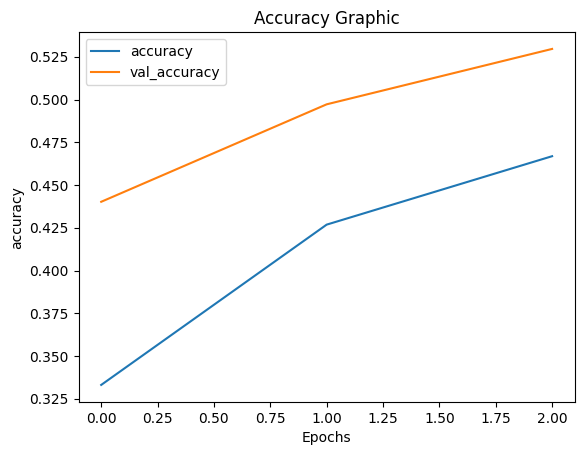

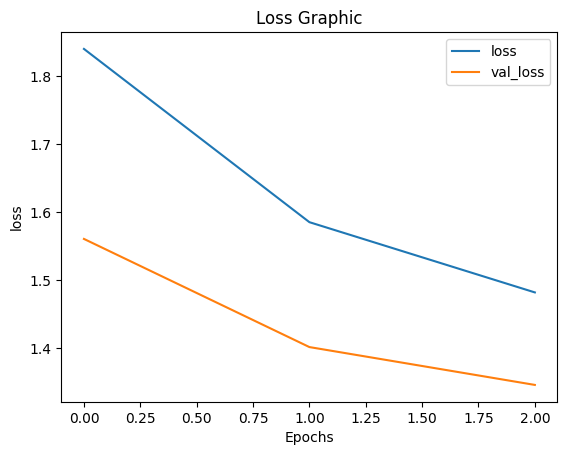

In [9]:
# Grafik
def plot_graphs(history, string, title):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.title(title)
    plt.show()

plot_graphs(history, "accuracy", "Accuracy Graphic")     # Menampilkan grafik akurasi
plot_graphs(history, "loss", "Loss Graphic")             # Menampilkan grafik loss

In [10]:
# Evaluasi dan Prediksi
eval = model.evaluate(test_images, test_labels)
print(f'Test loss: {eval[0]} \nTest accuracy: {eval[1]}')

dict_label = {0: 'airplane', 1: 'automobile', 2: 'bird',
              3: 'cat', 4: 'deer', 5: 'dog',
              6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

313/313 [==============================] - 10s 32ms/step - loss: 1.3463 - accuracy: 0.5296
Test loss: 1.3463231325149536 
Test accuracy: 0.5296000242233276


1/1 [==============================] - 0s 111ms/step


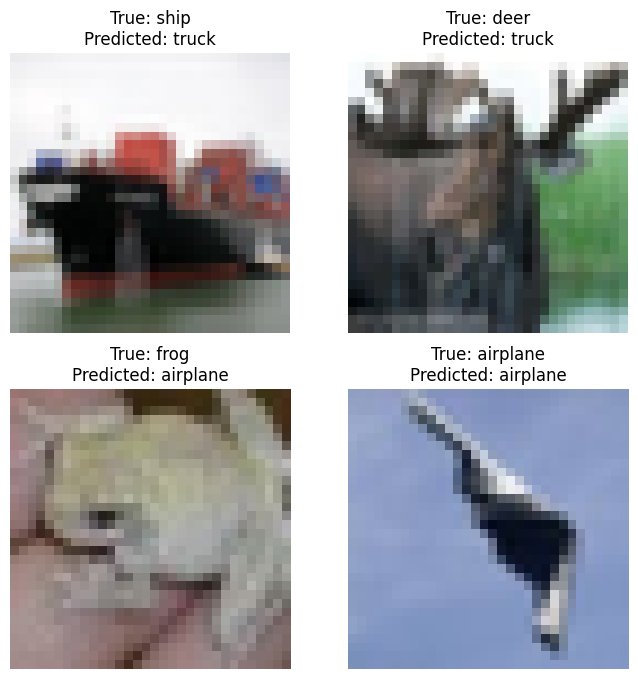

In [11]:

# Visualisasi hasil prediksi
def predict():
    some_random_number = np.random.randint(low=0, high=len(test_images)-1, size=4)
    sample_images = test_images[some_random_number]
    sample_label = test_labels[some_random_number]
    predicted = model.predict(sample_images)
    predicted = np.argmax(predicted, axis=1)
    true_label = np.argmax(sample_label, axis=1)
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    for row in range(2):
        for col in range(2):
            if row == 0:
                true = true_label[row+col]
                pred = predicted[row+col]
                axs[row, col].imshow(sample_images[row+col])
            else:
                true = true_label[row+col+1]
                pred = predicted[row+col+1]
                axs[row, col].imshow(sample_images[row+col+1])
            axs[row, col].set_title(f'True: {dict_label[true]}\nPredicted: {dict_label[pred]}')
            axs[row,col].axis('off')

predict()